In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA
import plotnine as p9
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', None)

data = pd.read_csv('medical_clean.csv', index_col='CaseOrder')
data


,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2


In [58]:
data.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [60]:
data.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [61]:
data.duplicated().sum()

0

In [62]:
data.isnull().sum()


Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
Item1           

In [63]:
#setting new names for columns Item1-8
new_col_names={'Item1':'T_Admission', 'Item2':'T_Treatment', 'Item3':'T_Visits', 'Item4':'Reliability', 'Item5':'Options', 'Item6':'Hours_Treatment', 'Item7':'Staff', 'Item8':'Active_Listening'}
data.rename(columns=new_col_names, inplace=True)
data.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'T_Admission', 'T_Treatment', 'T_Visits', 'Reliability', 'Options',
       'Hours_Treatment', 'Staff', 'Active_Listening'],
      dtype='object')

In [64]:
#data columns converted from yes/no to 0/1
d = data.replace({'Yes':1, 'No':0})
d

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,T_Admission,T_Treatment,T_Visits,Reliability,Options,Hours_Treatment,Staff,Active_Listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2


In [65]:
#Update Strings to Int for Service CompRisk and InitialAdmin
d['Services'].replace(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'],[1,2,3,4], inplace=True)
d['Initial_admin'].replace(['Emergency Admission', 'Elective Admission', 'Observation Admission'], [3,2,1], inplace=True)
d['Complication_risk'].replace(['Low', 'Medium', 'High'], [1,2,3], inplace=True)
d['Gender'].replace(['Male', 'Female', 'Prefer not to answer'],[1,2,0], inplace=True)
d

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,T_Admission,T_Treatment,T_Visits,Reliability,Options,Hours_Treatment,Staff,Active_Listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,1,0,19.141466,6,0,0,0,3,1,0,2,0,1,1,0,1,1,1,0,1,1,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,2,0,18.940352,4,2,1,0,3,1,0,3,1,0,0,0,0,0,0,1,0,2,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,2,0,18.057507,4,1,0,0,2,1,0,2,1,0,1,0,0,0,0,0,0,1,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,1,0,16.576858,4,1,0,0,2,0,1,2,0,1,0,0,0,0,0,1,1,1,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,2,0,17.439069,5,0,2,1,2,0,0,1,0,0,0,1,0,0,1,0,0,3,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,1,0,16.980860,4,2,1,0,3,1,0,2,0,0,0,0,0,1,0,1,0,2,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,1,1,18.177020,5,0,0,0,2,1,0,2,1,1,1,0,0,0,0,0,1,3,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,2,1,17.129070,4,2,0,1,2,1,0,3,1,0,0,0,0,1,1,0,0,2,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2


In [66]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [67]:
data.to_csv('medical_clean2.csv')

In [68]:
dMedSorted = d[['Children','Age', 'Gender', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_admin', 'Complication_risk', 'Services', 'Initial_days', 'ReAdmis','Overweight', 'Anxiety', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'T_Admission', 'T_Treatment', 'T_Visits', 'Reliability', 'Options', 'Hours_Treatment', 'Staff', 'Active_Listening']]

dMedSorted.columns

Index(['Children', 'Age', 'Gender', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_admin', 'Complication_risk',
       'Services', 'Initial_days', 'ReAdmis', 'Overweight', 'Anxiety',
       'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
       'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'T_Admission', 'T_Treatment', 'T_Visits', 'Reliability', 'Options',
       'Hours_Treatment', 'Staff', 'Active_Listening'],
      dtype='object')

/Users/mattboruff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


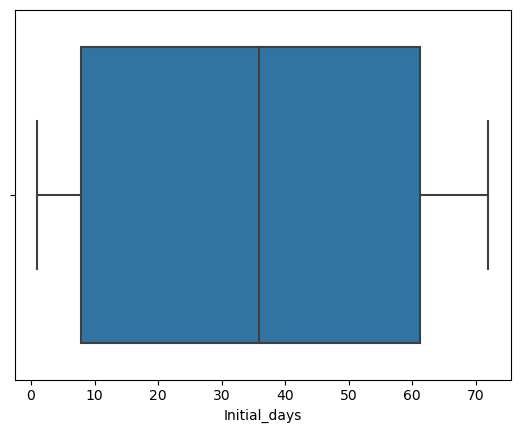

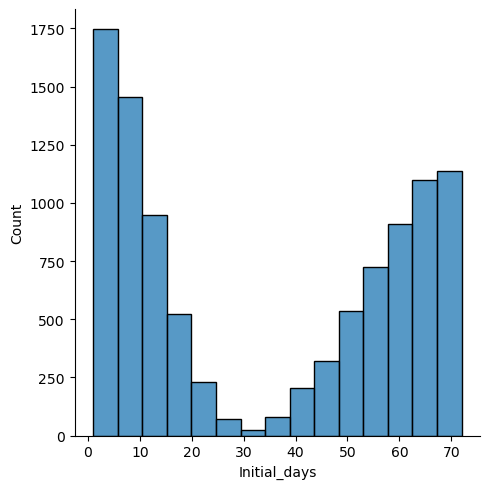

In [69]:
#Univariate Visuals
sns.boxplot('Initial_days', data=dMedSorted)
plt.show()
sns.displot(data['Initial_days'])

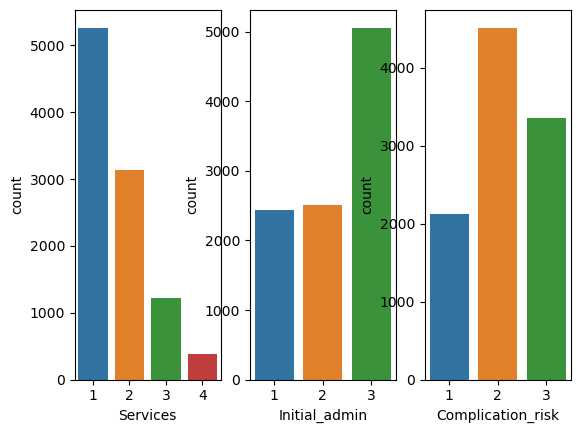

In [70]:
fig, ax=plt.subplots(1,3)
sns.countplot(x='Services', data=dMedSorted, ax=ax[0])
sns.countplot(x='Initial_admin', data=dMedSorted, ax=ax[1])
sns.countplot(x='Complication_risk', data=dMedSorted, ax=ax[2])
plt.show()

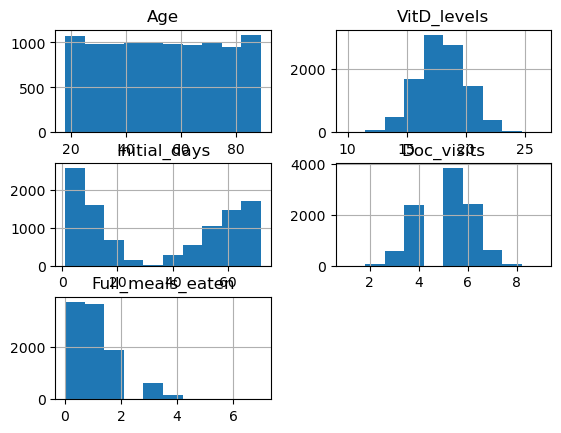

In [71]:
dMedSorted[['Age', 'VitD_levels', 'Initial_days', 'Doc_visits', 'Full_meals_eaten']].hist()
plt.show()

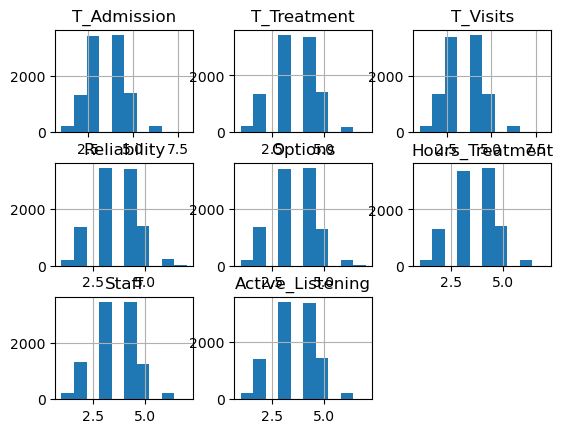

In [72]:
dMedSorted[['T_Admission', 'T_Treatment', 'T_Visits', 'Reliability', 'Options', 'Hours_Treatment', 'Staff', 'Active_Listening']].hist()
plt.show()

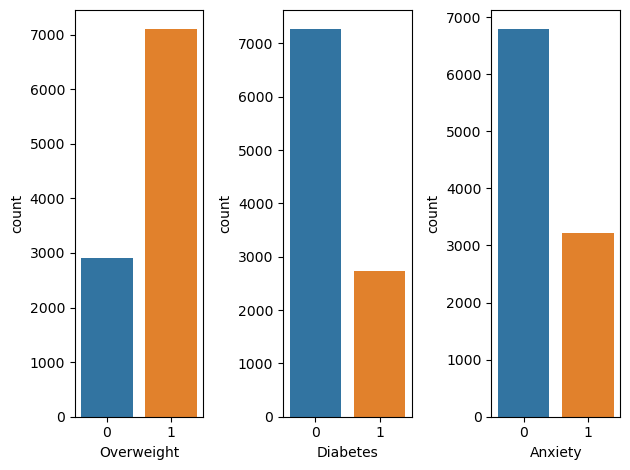

In [73]:
fig, ax=plt.subplots(1,3)
sns.countplot(x=dMedSorted['Overweight'], ax=ax[0])
sns.countplot(x=dMedSorted['Diabetes'], ax=ax[1])
sns.countplot(x=dMedSorted['Anxiety'], ax=ax[2])
plt.tight_layout()
fig.show(0)

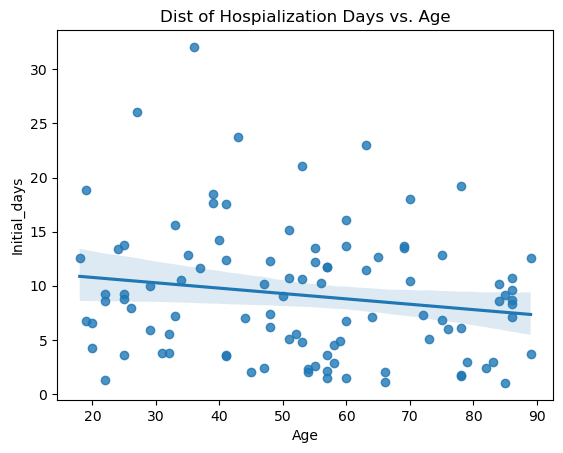

In [74]:
#Bivariant and Reduced sample size 
data_sample=dMedSorted.head(100)
sns.regplot(x='Age', y='Initial_days', data=data_sample)
plt.title('Dist of Hospialization Days vs. Age')
plt.show()

<AxesSubplot:xlabel='ReAdmis', ylabel='Initial_days'>

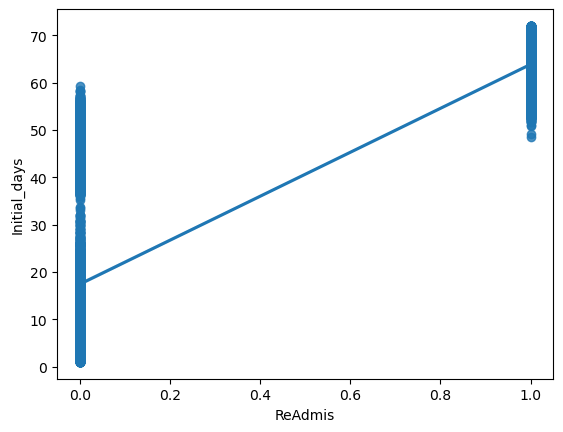

In [75]:
#Corelation between ReAdmis chance and Initial Days
sns.regplot(x='ReAdmis', y='Initial_days', data=d)

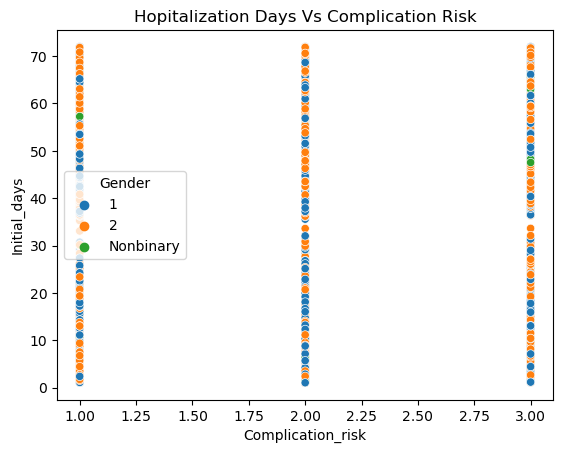

In [76]:
sns.scatterplot(x='Complication_risk', y='Initial_days', hue='Gender', data=d)
plt.title('Hopitalization Days Vs Complication Risk')
plt.show()

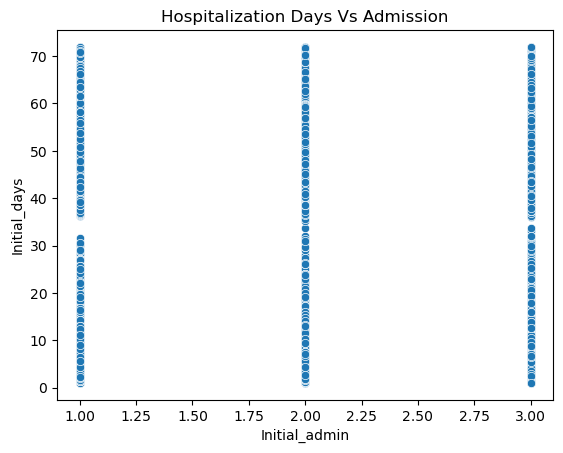

In [77]:
sns.scatterplot(x='Initial_admin', y='Initial_days', data=d)
plt.title('Hospitalization Days Vs Admission')
plt.show()

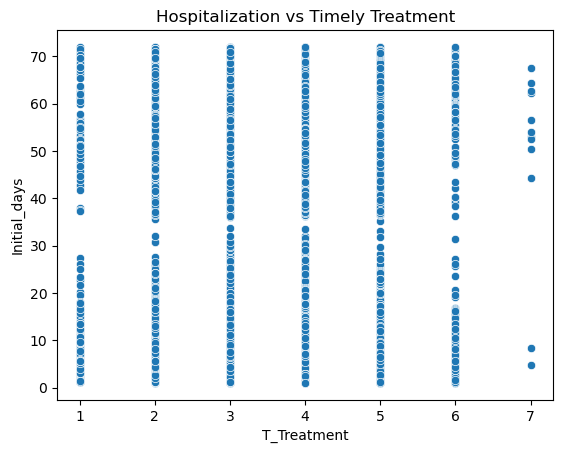

In [78]:
sns.scatterplot(x='T_Treatment', y='Initial_days', data=d)
plt.title('Hospitalization vs Timely Treatment')
plt.show()

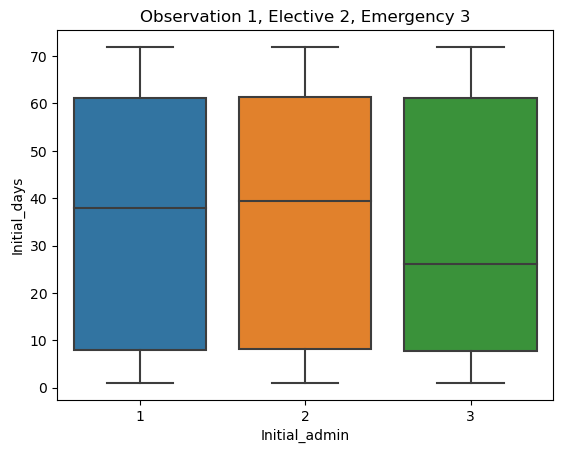

In [79]:
#Emergency Admis = 3  Elective = 2 Obs = 1
sns.boxplot(x='Initial_admin', y='Initial_days', data=d)
plt.title('Observation 1, Elective 2, Emergency 3')
plt.show()

In [80]:
#Starting the mulitple regression
m_data=ols('Initial_days~ Children + Age + VitD_levels + Doc_visits + Full_meals_eaten + vitD_supp + Initial_admin + Complication_risk + Services + T_Admission + T_Treatment + T_Visits + Reliability + Options + Hours_Treatment + Staff + Active_Listening + Soft_drink + HighBlood + Stroke + Overweight + Arthritis + Diabetes + Hyperlipidemia + BackPain + Anxiety + Allergic_rhinitis + Reflux_esophagitis + Asthma', data = d).fit()
m_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.317
Date:                Tue, 28 Mar 2023   Prob (F-statistic):              0.119
Time:                        21:29:00   Log-Likelihood:                -46869.
No. Observations:               10000   AIC:                         9.380e+04
Df Residuals:                    9970   BIC:                         9.401e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             37.7926      3.845      9.829      0.000      30.256      45.329
Children               0.2716      0.122      2.232      0.026       0.033       0.510
Age                    0.0203      0.013      1.593      0.111      -0.005       0.045
VitD_levels           -0.0315      0.131     -0.241      0.810      -0.288       0.225
Doc_visits            -0.1798      0.252     -0.714      0.475      -0.673       0.314
Full_meals_eaten      -0.4421      0.261     -1.692      0.091      -0.954       0.070
vitD_supp              0.6671      0.419      1.592      0.111      -0.154       1.488
Initial_admin         -0.2902      0.319     -0.909      0.364      -0.916       0.336
Complication_risk     -0.4770      0.361     -1.323      0.186      -1.184       0.230
Services               0.0673      0.316      0.213      0.832      -0.553       0.687
T_Admission           -0.8244      0.379     -2.174      0.030      -1.568      -0.081
T_Treatment            0.2611      0.350      0.746      0.455      -0.425       0.947
T_Visits               0.0347      0.323      0.107      0.914      -0.598       0.667
Reliability           -0.3598      0.288     -1.251      0.211      -0.923       0.204
Options                0.0161      0.303      0.053      0.958      -0.578       0.610
Hours_Treatment       -0.0538      0.313     -0.172      0.863      -0.667       0.559
Staff                  0.3519      0.294      1.195      0.232      -0.225       0.929
Active_Listening      -0.0575      0.277     -0.208      0.836      -0.601       0.486
Soft_drink             0.1644      0.603      0.273      0.785      -1.017       1.346
HighBlood             -0.3438      0.536     -0.642      0.521      -1.394       0.706
Stroke                -0.1264      0.659     -0.192      0.848      -1.418       1.165
Overweight            -0.5901      0.580     -1.018      0.309      -1.727       0.547
Arthritis              1.0286      0.550      1.872      0.061      -0.049       2.106
Diabetes              -0.1239      0.591     -0.210      0.834      -1.283       1.035
Hyperlipidemia        -0.1959      0.557     -0.352      0.725      -1.288       0.897
BackPain               0.9117      0.535      1.703      0.089      -0.138       1.961
Anxiety                0.6454      0.564      1.145      0.252      -0.460       1.750
Allergic_rhinitis      0.2157      0.539      0.400      0.689      -0.841       1.272
Reflux_esophagitis     0.6709      0.535      1.254      0.210      -0.378       1.719
Asthma                -0.7957      0.581     -1.370      0.171      -1.934       0.343
==============================================================================
Omnibus:                    41652.924   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [81]:
print('R2 score:', m_data.rsquared)

R2 score: 0.003815829743797683


In [82]:
#Run the F test and check for independent variables
print('F-statistic:', m_data.fvalue)
print('probability of observing value at least as high as F-Statistic:', m_data.f_pvalue)

F-statistic: 1.3168809433230266
probability of observing value at least as high as F-Statistic: 0.11864182587747099


In [83]:
print('p-values:', m_data.pvalues)

p-values: Intercept             1.066882e-22
Children              2.565722e-02
Age                   1.112780e-01
VitD_levels           8.095092e-01
Doc_visits            4.752569e-01
Full_meals_eaten      9.073976e-02
vitD_supp             1.113649e-01
Initial_admin         3.636255e-01
Complication_risk     1.860026e-01
Services              8.315262e-01
T_Admission           2.969167e-02
T_Treatment           4.554369e-01
T_Visits              9.144763e-01
Reliability           2.108317e-01
Options               9.575797e-01
Hours_Treatment       8.633913e-01
Staff                 2.320992e-01
Active_Listening      8.356199e-01
Soft_drink            7.849952e-01
HighBlood             5.210159e-01
Stroke                8.478636e-01
Overweight            3.089070e-01
Arthritis             6.127904e-02
Diabetes              8.340309e-01
Hyperlipidemia        7.252017e-01
BackPain              8.862610e-02
Anxiety               2.522655e-01
Allergic_rhinitis     6.889268e-01
Reflux_eso

In [84]:
#Create predicted values and residuals, adding two columns. 
d['Initial_days_predict']=m_data.predict()
d['residual']=m_data.resid
d.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,T_Admission,T_Treatment,T_Visits,Reliability,Options,Hours_Treatment,Staff,Active_Listening,Initial_days_predict,residual
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,1,0,19.141466,6,0,0,0,3,1,0,2,0,1,1,0,1,1,1,0,1,1,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,35.628467,-25.042697
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,2,0,18.940352,4,2,1,0,3,1,0,3,1,0,0,0,0,0,0,1,0,2,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,33.648863,-18.519301
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,2,0,18.057507,4,1,0,0,2,1,0,2,1,0,1,0,0,0,0,0,0,1,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,34.240386,-29.468209
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,1,0,16.576858,4,1,0,0,2,0,1,2,0,1,0,0,0,0,0,1,1,1,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,36.197541,-34.482662
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,2,0,17.439069,5,0,2,1,2,0,0,1,0,0,0,1,0,0,1,0,0,3,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,36.516865,-35.262058


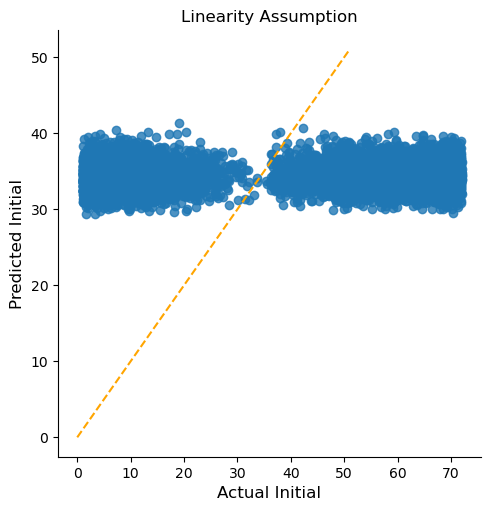

In [85]:
#scatter plot of residuals then plotting Observed vs Predicted
sns.lmplot(x='Initial_days', y='Initial_days_predict', data=d, fit_reg=False, height=5)
#lets add the diagonal line too while we are at it
line_coords=np.arange(d[['Initial_days_predict']].max().max()+10)
plt.plot(line_coords, line_coords, color='orange', linestyle='--')
plt.ylabel('Predicted Initial', fontsize=12)
plt.xlabel('Actual Initial', fontsize=12)
plt.title('Linearity Assumption')
plt.show()

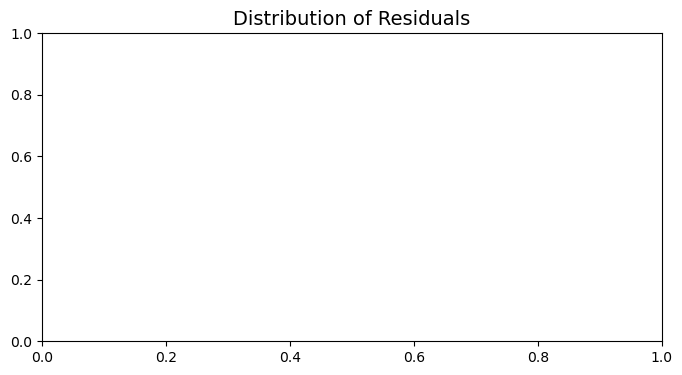

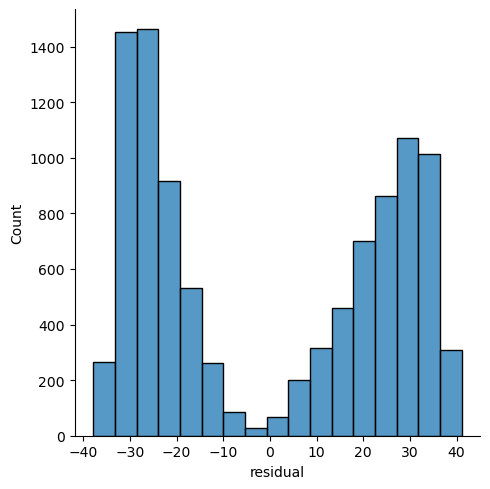

In [86]:
#Normal Dist of residual values
#plotting Resid of Dist
plt.subplots(figsize=(8,4))
plt.title('Distribution of Residuals', fontsize=14)
sns.displot(d['residual'])
plt.show()


In [87]:
from statsmodels.stats.diagnostic import normal_ad
#Testing the residuals
p_value = normal_ad(d['residual'])[1]
print('p-value from the test Anderson-Darling test below .05 generally means non-normal:', p_value)
#reporting the normality of resid's 
if p_value <.05:
    print('Residuals are not Normally Distributed')
else:
    print('Residuals are distributed normally')

p-value from the test Anderson-Darling test below .05 generally means non-normal: 0.0
Residuals are not Normally Distributed


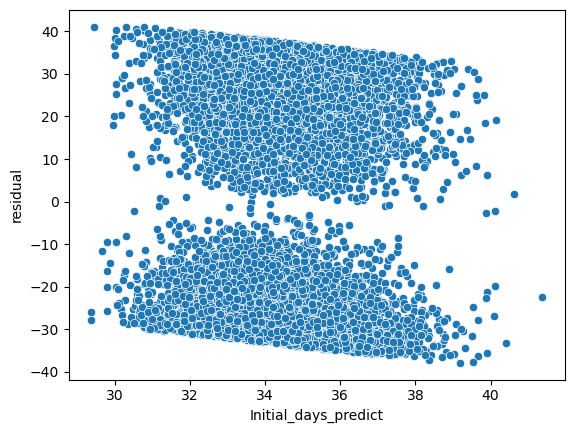

In [88]:
#residual plots
sns.scatterplot(x='Initial_days_predict', y='residual', data=d)
plt.show()

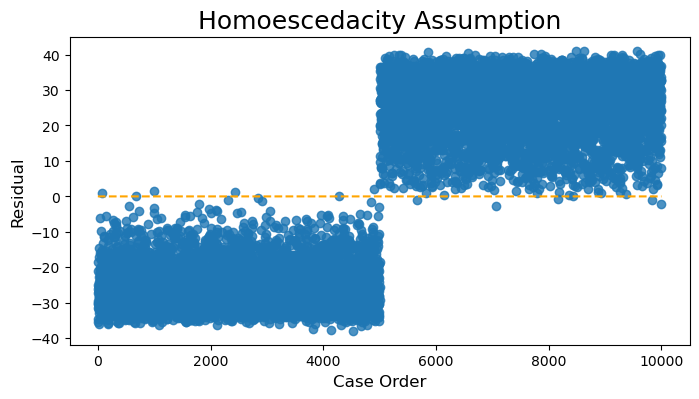

In [98]:
#Homoscedasticity The variation in the errors acorss variables is similar
#Heteroscedasticity, the violation of homo, occurs when we do not have even variance across error terms. to detect homo, we can plt residual and iss if the vairance is uniform
#Plotting the residuals
plt.subplots(figsize=(8,4))
plt.scatter(x=d.index, y=d.residual, alpha=.8)
plt.plot(np.repeat(0, len(d.index)+2), color='orange', linestyle='--')
plt.ylabel('Residual', fontsize=12)
plt.xlabel('Case Order', fontsize=12)
plt.title('Homoescedacity Assumption', fontsize=18)
plt.show()

<AxesSubplot:>

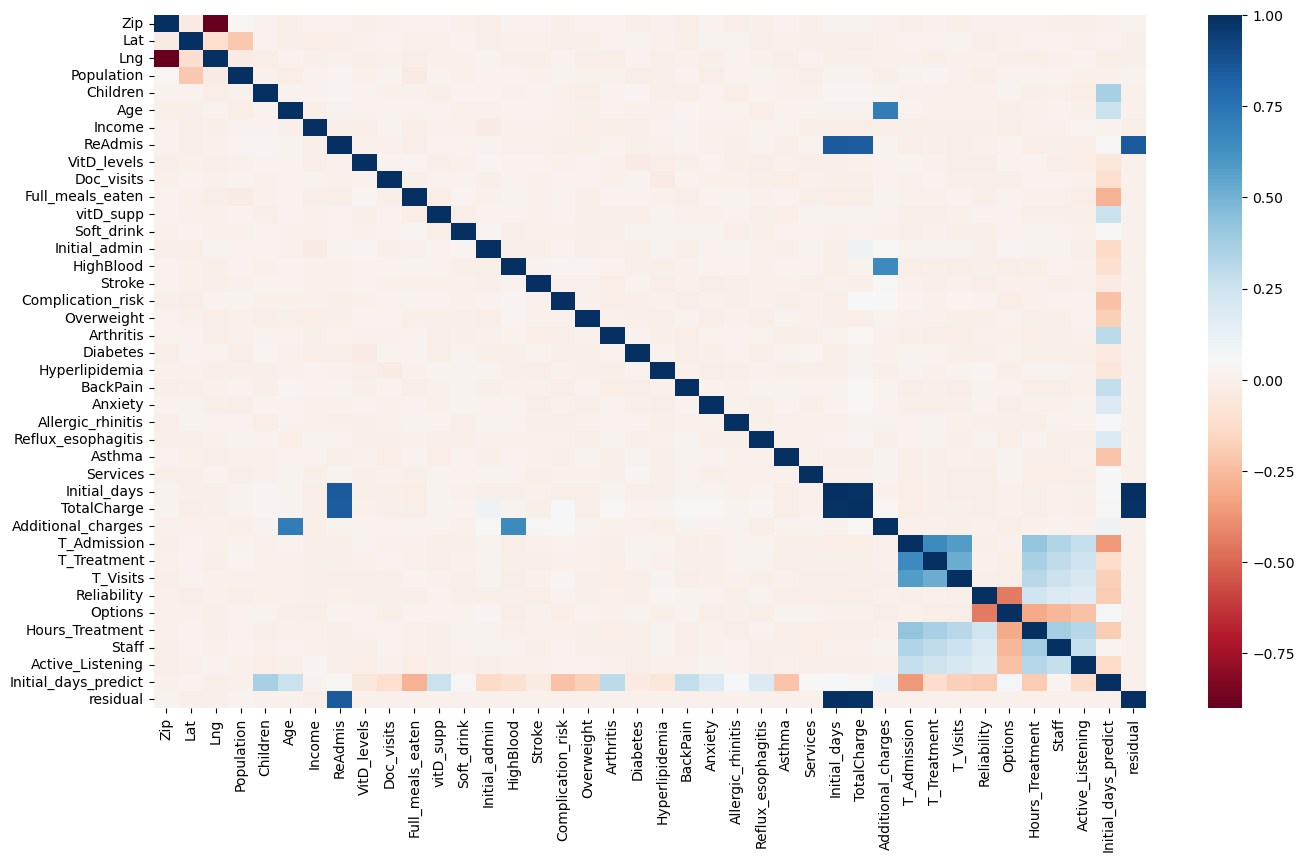

In [90]:
#Checking for multicolinearity by correlation
corr=d.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

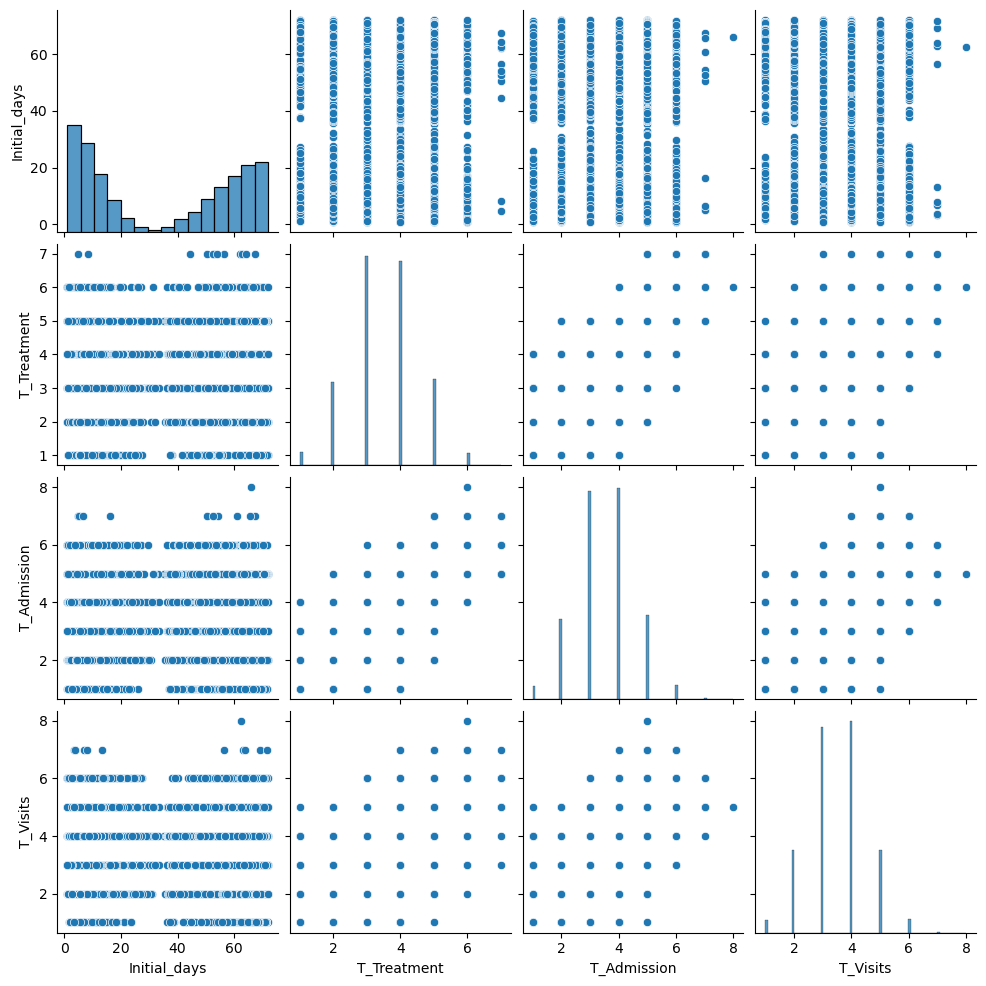

In [91]:
#Attempt to isolate independent variables that have some relationships between themselves
sns.pairplot(d[['Initial_days', 'T_Treatment', 'T_Admission', 'T_Visits']])
plt.show()

In [97]:
#VIF large VIF means high multicollinearity
#Initial Model Validation, last step
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
vif['Features']=d.columns
vif

TypeError: '>=' not supported between instances of 'int' and 'str'

In [214]:
model_rev = model_rev = ols('Initial_days~Children + T_Admission', data=d).fit()
print(model_rev.summary()) 
print(model_rev.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.015
Date:                Mon, 27 Mar 2023   Prob (F-statistic):            0.00665
Time:                        15:00:49   Log-Likelihood:                -46883.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9997   BIC:                         9.379e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      35.8822      0.968     37.061      

<AxesSubplot:>

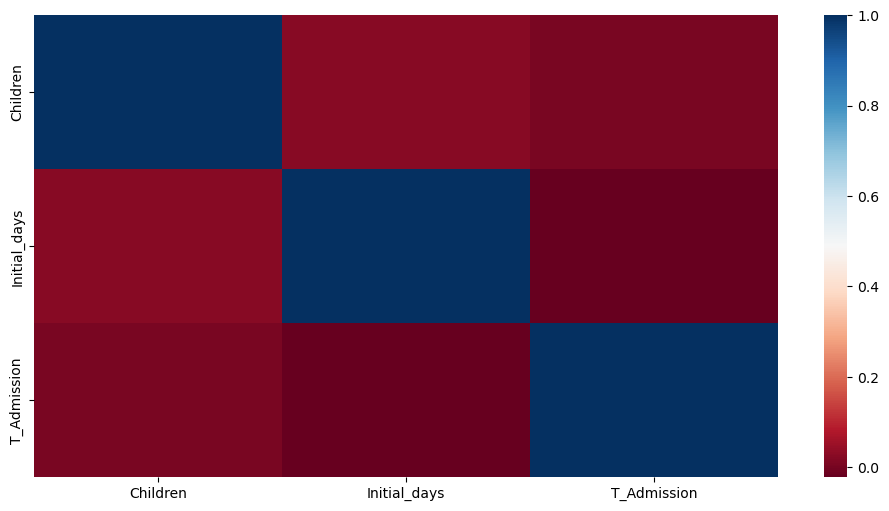

In [222]:
#Looking for Multicolinearity through correlation
x=d[['Children', 'Initial_days', 'T_Admission']]
corr=x.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [224]:
print('R-Square:', model_rev.rsquared)

R-Square: 0.0010023109063076463


In [225]:
print('F-pvalue:', model_rev.f_pvalue)

F-pvalue: 0.006653823955992259


In [226]:
print(model_rev.params)

Intercept      35.882234
Children        0.273766
T_Admission    -0.568682
dtype: float64


In [227]:
print(model_rev.pvalues)

Intercept      7.757493e-282
Children        2.433020e-02
T_Admission     2.567716e-02
dtype: float64


In [240]:
#Making model prediction and adding resid'set
d['Initial_days_predict']=model_rev.predict(x)
d['residual']=model_rev.resid
d.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'T_Admission', 'T_Treatment', 'T_Visits', 'Reliability', 'Options',
       'Hours_Treatment', 'Staff', 'Active_Listening', 'Initial_days_predict',
       'residual'],
      dtype='object')

/Users/mattboruff/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


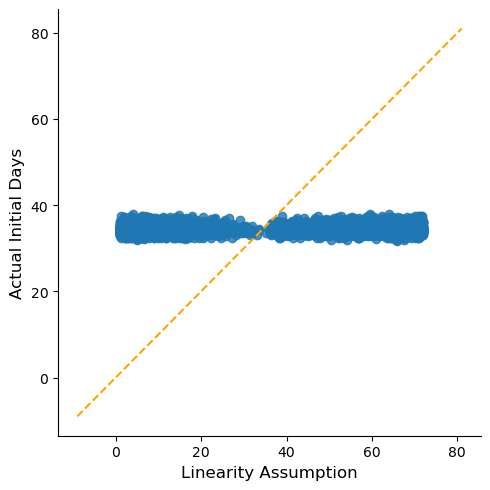

In [243]:
#Plotting the Obs vs Pred for linearity
sns.lmplot(x='Initial_days', y='Initial_days_predict', data=d, fit_reg=False, size =5)
#adding the diagonal line
line_coords = np.arange(x[['Initial_days', 'Initial_days_predict']].min().min()-10, x[['Initial_days', 'Initial_days_predict']].max().max()+10)
plt.plot(line_coords, line_coords, color='orange', linestyle='--')
plt.ylabel('Actual Initial Days', fontsize=12)
plt.xlabel('Linearity Assumption', fontsize=12)
plt.show()

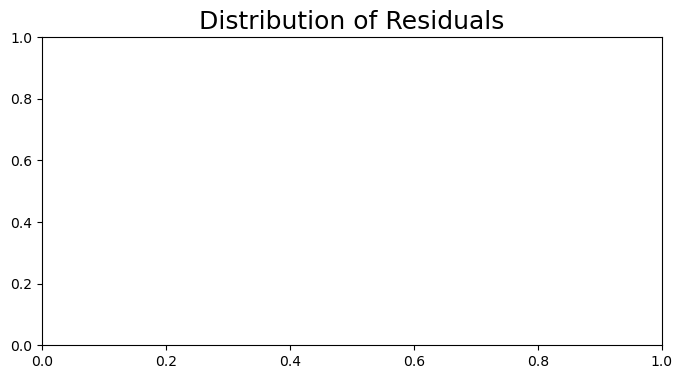

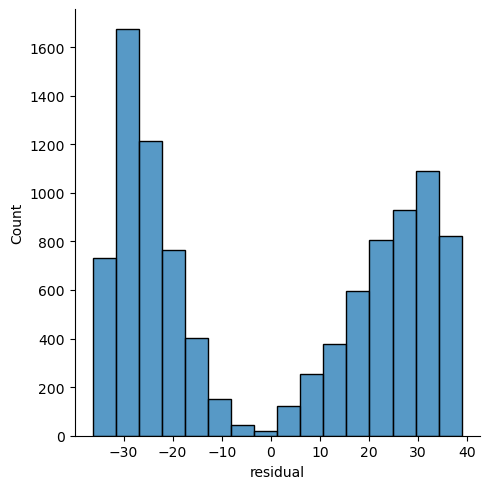

In [245]:
#Plotting residuals distribution for normalitu
plt.subplots(figsize=(8,4))
plt.title('Distribution of Residuals', fontsize=18)
sns.displot(x['residual'])
plt.show()

In [246]:
#Performing the test on residuals
p_value=normal_ad(x['residual'])[1]
print('p vlaue from the Anderson-Darling test below .05 generally means the data is not normal:', p_value)
#Normality of residuals
if p_value<.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

p vlaue from the Anderson-Darling test below .05 generally means the data is not normal: 0.0
Residuals are not normally distributed


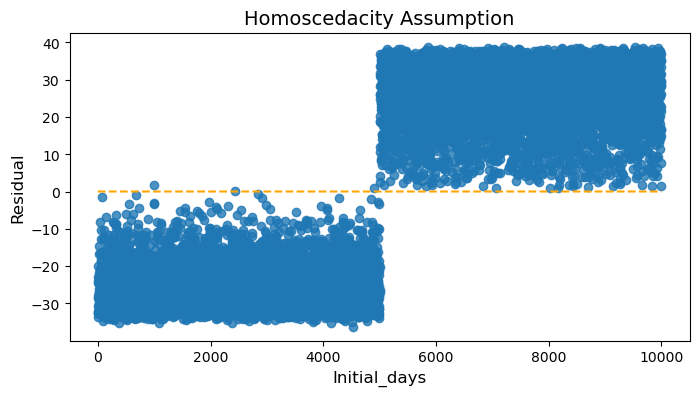

In [248]:
#Plotting for homoscedacity
plt.subplots(figsize=(8,4))
plt.scatter(x=x.index, y=x.residual, alpha=.8)
plt.plot(np.repeat(0, len(x.index)+2), color='orange', linestyle='--')
plt.ylabel('Residual', fontsize=12)
plt.xlabel('Initial_days', fontsize=12)
plt.title('Homoscedacity Assumption', fontsize=14)
plt.show()

In [56]:
print(x['residual'].mean())

KeyError: 'residuals'